In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import sweetviz as sv
import seaborn as sns
%matplotlib inline

# EDA

In [26]:
#Load dataset
usedcar=pd.read_csv("gernman selling car dataset.csv",encoding= 'unicode_escape',low_memory=False)

#Delete Unnecessory features
usedcar.drop('nrOfPictures',axis=1,inplace=True)
usedcar.drop('dateCrawled',axis=1,inplace=True)
usedcar.drop('postalCode',axis=1,inplace=True)
usedcar.drop('lastSeen',axis=1,inplace=True)
usedcar.drop('seller',axis=1,inplace=True)
usedcar.drop('offerType',axis=1,inplace=True)

#convert data in english readable form
usedcar["notRepairedDamage"] = usedcar["notRepairedDamage"].replace("nein", 'no').replace("ja", 'yes')
usedcar["fuelType"] = usedcar["fuelType"].replace("benzin", 'petrol')
usedcar["gearbox"] = usedcar["gearbox"].replace("manuell", 'manual').replace('automatik','automatic')

#Dropping all null observations
usedcar.dropna(inplace=True)
usedcar.reset_index(drop=True, inplace=True)
usedcar.isna().sum()

#Check and drop duplicates if any
#print("Shape of Dataset: ",usedcar.shape)

count=usedcar[usedcar.duplicated()].count()
#print("Total No. of Duplicate Records are: \n",count)
usedcar.drop_duplicates(inplace=True)
#print("All Duplicate Records are deleted \n")
#print("Shape of Dataset After Droping: ",usedcar.shape)
#check na values
countna=usedcar.isna().sum().sum()
#print("Total No. of Na Records are: \n",countna)

countnull=usedcar.isnull().sum().sum()
#print("Total No. of Null Records are: \n",countnull)
usedcar.reset_index(drop=True, inplace=True)

#Remove outliers of all feature

#Outlier Removal in Numeric Columns using IQR technique 
for col in usedcar:
    if (usedcar.dtypes[col]!=object):
        percentile25 = usedcar[col].quantile(0.25)
        percentile75 = usedcar[col].quantile(0.75)
        iqr=percentile75-percentile25

        upper_limit = percentile75 + 1.5 * iqr
        lower_limit = percentile25 - 1.5 * iqr

        usedcar[col] = np.where(usedcar[col] > upper_limit,upper_limit,np.where(usedcar[col] < lower_limit,lower_limit, usedcar[col]))


#Convert categorical columns in numerical
for col in usedcar:
    if (usedcar.dtypes[col]==object):
        #Convert categorical col to Numeric
        usedcar[col]=usedcar[col].factorize(sort=True)[0]
        print("\n Column Name:",col)
        print("\n Numeric values:", usedcar[col])
print("Shape of the Data set is :",usedcar.shape)
#print(usedcar.info())



 Column Name: name

 Numeric values: 0          49847
1         110369
2          17687
3          94166
4         120736
           ...  
259309    149771
259310     90901
259311    114029
259312    137392
259313     27185
Name: name, Length: 259314, dtype: int64

 Column Name: abtest

 Numeric values: 0         1
1         1
2         1
3         1
4         1
         ..
259309    0
259310    0
259311    1
259312    1
259313    0
Name: abtest, Length: 259314, dtype: int64

 Column Name: vehicleType

 Numeric values: 0         4
1         4
2         6
3         2
4         6
         ..
259309    6
259310    1
259311    2
259312    1
259313    6
Name: vehicleType, Length: 259314, dtype: int64

 Column Name: gearbox

 Numeric values: 0         1
1         1
2         1
3         1
4         1
         ..
259309    1
259310    1
259311    0
259312    1
259313    1
Name: gearbox, Length: 259314, dtype: int64

 Column Name: model

 Numeric values: 0         118
1         103
2         

In [27]:
#Convert categorical columns in numerical
#for col in usedcar:
    #if (usedcar.dtypes[col]==object):
        #Convert categorical col to Numeric
codes, uniques=usedcar['dateCreated'].factorize(sort=True)
print("\n Column name: abtest")
print("\n Codes:",np.unique(codes))
print("\n Uniques:", uniques)


 Column name: abtest

 Codes: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106]

 Uniques: Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
             97,  98,  99, 100, 101, 102, 103, 104, 105, 106],
           dtype='int64', length=107)


In [13]:
usedcar["notRepairedDamage"].unique()

array(['no', 'yes'], dtype=object)

In [14]:
#Checking the distribution with Skewness
#skewness in the data
usedcar.skew()

C:\Users\pc\AppData\Local\Temp\ipykernel_15224\690729983.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  usedcar.skew()


price                  1.134551
yearOfRegistration    -0.431080
powerPS                0.395435
kilometer             -1.377983
monthOfRegistration    0.072632
dtype: float64

In [28]:
#Store dataset in df_norm 
df_norm=usedcar
#Get 20000 random observations from dataset
#df_norm = df_norm.sample(n=20000)

In [74]:
usedcar.shape

(259314, 14)

# Normalization of data 

In [9]:
# use RobustScaler, StandardScaler and MinMaxScaler normalization with sklearn

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
names = df_norm.columns  #get all columns

#RobustScalar works better if outliers are present
scaler = RobustScaler()
robust_df = scaler.fit_transform(df_norm)
df_norm = pd.DataFrame(robust_df, columns =names)
robust_df = df_norm 


#Standard Scalar gives values in between -1 t0 1
x = df_norm.drop(['price'], axis=1) 
scaler = StandardScaler()
standard_df = scaler.fit_transform(df_norm)
df_norm = pd.DataFrame(standard_df, columns =names)
standard_df= df_norm

#Minmax Scalar gives values in between 0 to 1
x = df_norm.drop(['price'], axis=1) 
scaler = MinMaxScaler()
minmax_df = scaler.fit_transform(df_norm)
df_norm= pd.DataFrame(minmax_df, columns =names)
minmax_df= df_norm
"""

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))

ax1.set_title('Before Scaling')
 
sns.kdeplot(df_norm['name'], ax = ax1)
sns.kdeplot(df_norm['abtest'], ax = ax1)
sns.kdeplot(df_norm['vehicleType'], ax = ax1)
sns.kdeplot(df_norm['yearOfRegistration'], ax = ax1)
sns.kdeplot(df_norm['gearbox'], ax = ax1)
sns.kdeplot(df_norm['powerPS'], ax = ax1)
sns.kdeplot(df_norm['model'], ax = ax1)
sns.kdeplot(df_norm['kilometer'], ax = ax1)
sns.kdeplot(df_norm['monthOfRegistration'], ax = ax1)
sns.kdeplot(df_norm['fuelType'], ax = ax1)
sns.kdeplot(df_norm['brand'], ax = ax1)
sns.kdeplot(df_norm['notRepairedDamage'], ax = ax1)
sns.kdeplot(df_norm['dateCreated'], ax = ax1)
sns.kdeplot(df_norm['price'], ax = ax1)



ax2.set_title('After Robust Scaling')
 
sns.kdeplot(robust_df['name'], ax = ax2)
sns.kdeplot(robust_df['abtest'], ax = ax2)
sns.kdeplot(robust_df['vehicleType'], ax = ax2)
sns.kdeplot(robust_df['yearOfRegistration'], ax = ax2)
sns.kdeplot(robust_df['gearbox'], ax = ax2)
sns.kdeplot(robust_df['powerPS'], ax = ax2)
sns.kdeplot(robust_df['model'], ax = ax1)
sns.kdeplot(robust_df['kilometer'], ax = ax2)
sns.kdeplot(robust_df['monthOfRegistration'], ax = ax2)
sns.kdeplot(robust_df['fuelType'], ax = ax2)
sns.kdeplot(robust_df['brand'], ax = ax2)
sns.kdeplot(robust_df['notRepairedDamage'], ax = ax2)
sns.kdeplot(robust_df['dateCreated'], ax = ax2)
sns.kdeplot(robust_df['price'], ax = ax2)

ax3.set_title('After Standard Scaling')
 
sns.kdeplot(standard_df['name'], ax = ax3)
sns.kdeplot(standard_df['abtest'], ax = ax3)
sns.kdeplot(standard_df['vehicleType'], ax = ax3)
sns.kdeplot(standard_df['yearOfRegistration'], ax = ax3)
sns.kdeplot(standard_df['gearbox'], ax = ax3)
sns.kdeplot(standard_df['powerPS'], ax = ax3)
sns.kdeplot(standard_df['model'], ax = ax3)
sns.kdeplot(standard_df['kilometer'], ax = ax3)
sns.kdeplot(standard_df['monthOfRegistration'], ax = ax3)
sns.kdeplot(standard_df['fuelType'], ax = ax3)
sns.kdeplot(standard_df['brand'], ax = ax3)
sns.kdeplot(standard_df['notRepairedDamage'], ax = ax3)
sns.kdeplot(standard_df['dateCreated'], ax = ax3)
sns.kdeplot(standard_df['price'], ax = ax3)


ax4.set_title('After Min-Max Scaling')

sns.kdeplot(minmax_df['name'], ax = ax4)
sns.kdeplot(minmax_df['abtest'], ax = ax4)
sns.kdeplot(minmax_df['vehicleType'], ax = ax4)
sns.kdeplot(minmax_df['yearOfRegistration'], ax = ax4)
sns.kdeplot(minmax_df['gearbox'], ax = ax4)
sns.kdeplot(minmax_df['powerPS'], ax = ax4)
sns.kdeplot(minmax_df['model'], ax = ax4)
sns.kdeplot(minmax_df['kilometer'], ax = ax4)
sns.kdeplot(minmax_df['monthOfRegistration'], ax = ax4)
sns.kdeplot(minmax_df['fuelType'], ax = ax4)
sns.kdeplot(minmax_df['brand'], ax = ax4)
sns.kdeplot(minmax_df['notRepairedDamage'], ax = ax4)
sns.kdeplot(minmax_df['dateCreated'], ax = ax4)
sns.kdeplot(minmax_df['price'], ax = ax4)

plt.show()

"""

"\n\nfig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))\n\nax1.set_title('Before Scaling')\n \nsns.kdeplot(df_norm['name'], ax = ax1)\nsns.kdeplot(df_norm['abtest'], ax = ax1)\nsns.kdeplot(df_norm['vehicleType'], ax = ax1)\nsns.kdeplot(df_norm['yearOfRegistration'], ax = ax1)\nsns.kdeplot(df_norm['gearbox'], ax = ax1)\nsns.kdeplot(df_norm['powerPS'], ax = ax1)\nsns.kdeplot(df_norm['model'], ax = ax1)\nsns.kdeplot(df_norm['kilometer'], ax = ax1)\nsns.kdeplot(df_norm['monthOfRegistration'], ax = ax1)\nsns.kdeplot(df_norm['fuelType'], ax = ax1)\nsns.kdeplot(df_norm['brand'], ax = ax1)\nsns.kdeplot(df_norm['notRepairedDamage'], ax = ax1)\nsns.kdeplot(df_norm['dateCreated'], ax = ax1)\nsns.kdeplot(df_norm['price'], ax = ax1)\n\n\n\nax2.set_title('After Robust Scaling')\n \nsns.kdeplot(robust_df['name'], ax = ax2)\nsns.kdeplot(robust_df['abtest'], ax = ax2)\nsns.kdeplot(robust_df['vehicleType'], ax = ax2)\nsns.kdeplot(robust_df['yearOfRegistration'], ax = ax2)\nsns.kdeplot

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an 

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an 

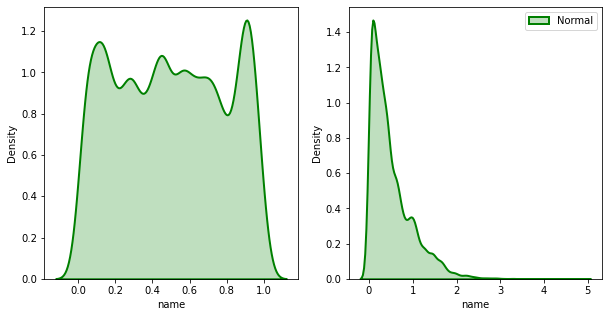

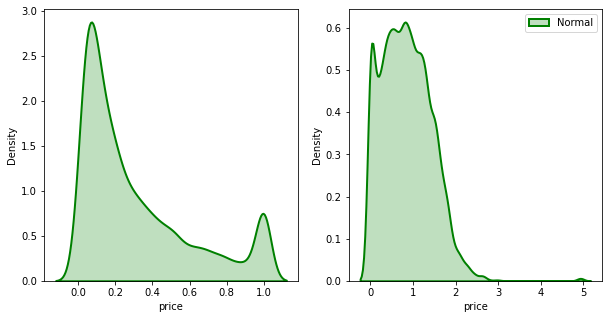

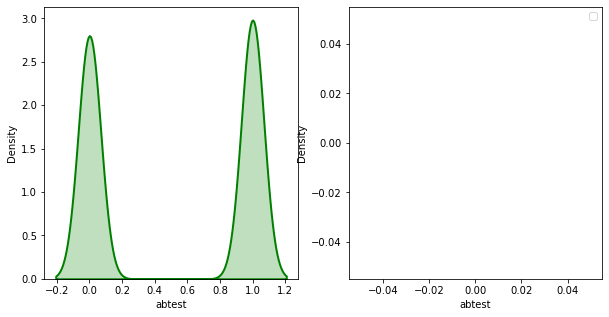

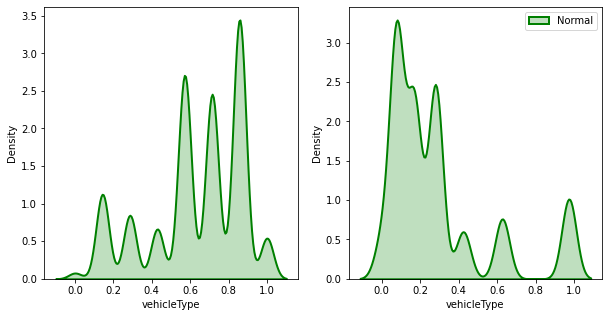

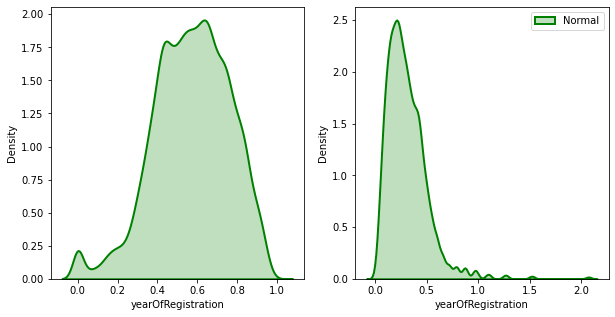

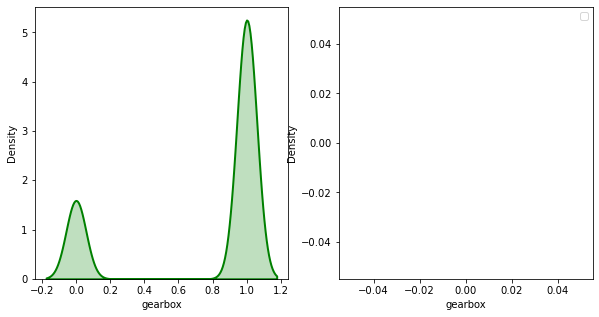

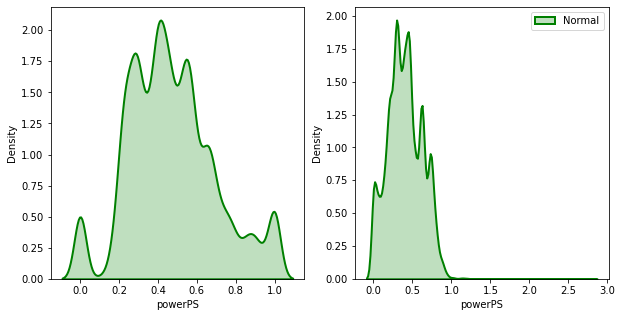

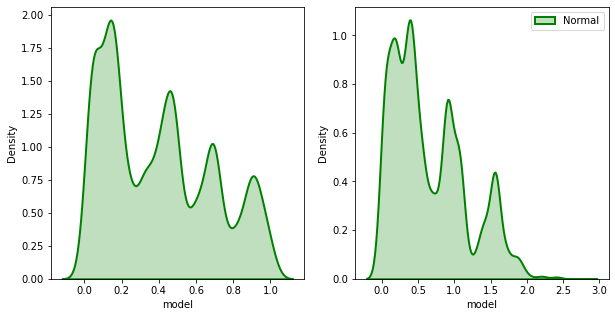

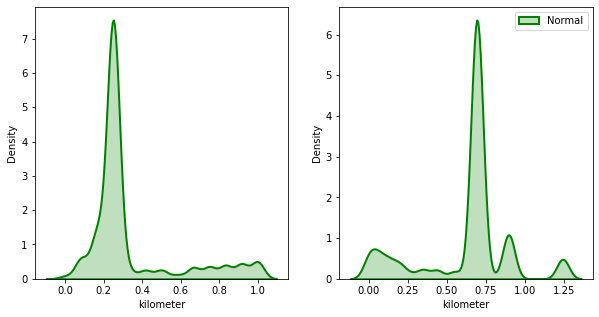

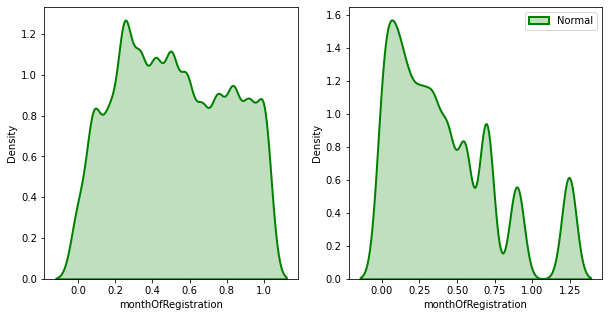

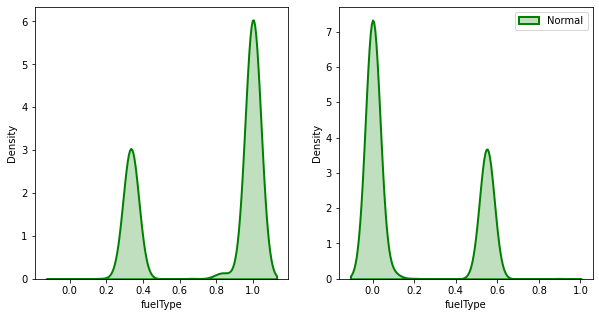

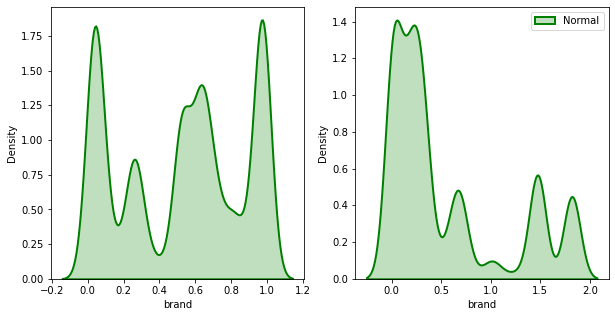

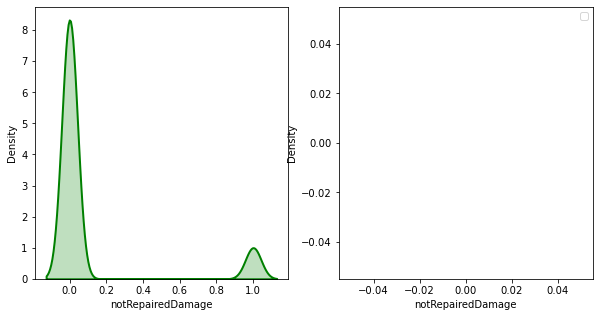

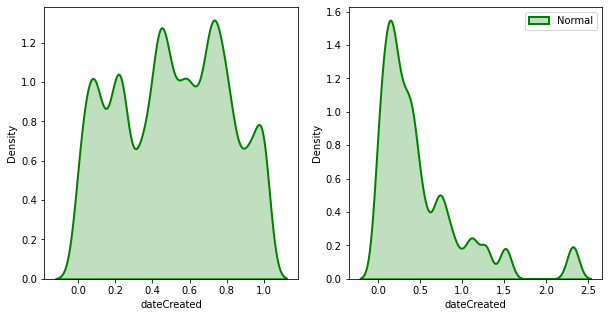

In [65]:
"""
#Normalization columnwise and use squreroot and logarithmic transformation on each column
import seaborn as sns
for col in df_norm:
    fitted_data =1/np.sqrt(df_norm[col])
    fitted_data =np.log(fitted_data)
    # creating axes to draw plots
    fig, ax = plt.subplots(1, 2)
    # plotting the original data(non-normal) and 
    # fitted data (normal)
    sns.distplot(df_norm[col], hist = False, kde = True,kde_kws = {'shade': True, 'linewidth': 2},label = "Non-Normal", color ="green", ax = ax[0])
    sns.distplot(fitted_data, hist = False, kde = True,kde_kws = {'shade': True, 'linewidth': 2}, label = "Normal", color ="green", ax = ax[1])
    # adding legends to the subplots
    plt.legend(loc = "upper right")
    # rescaling the subplots
    fig.set_figheight(5)
    fig.set_figwidth(10)
    df_norm[col]=fitted_data
    
"""

# Data Split

In [25]:
# Data Split
from sklearn.model_selection import train_test_split

#Split the data
x = df_norm.drop(['price'], axis=1)
y = df_norm['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


# Regression Algorithms using default Parameters

In [71]:
# Regression Libraries
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


#models
bayesianRidge = BayesianRidge().fit(x_train,y_train)
randomForestRegressor=RandomForestRegressor(n_estimators = 5).fit(x_train,y_train) 
sVRegressor=SVR().fit(x_train,y_train)
decisionTreeRegressor=DecisionTreeRegressor().fit(x_train,y_train)
kNeighborsRegressor=KNeighborsRegressor().fit(x_train,y_train)


#Evaluating the Linear Regression Model

print("Naive Bayes Regression",bayesianRidge.score(x_test,y_test)*100)
print("Random Forest Regression",randomForestRegressor.score(x_test,y_test)*100)
print("Support Vector Regression",sVRegressor.score(x_test,y_test)*100)
print("Decision Tree Regression",decisionTreeRegressor.score(x_test,y_test)*100)
print("K Nearest Neighbor Regression",kNeighborsRegressor.score(x_test,y_test)*100)


Naive Bayes Regression 61.54281406192958
Random Forest Regression 83.97661148466122
Support Vector Regression 83.56312580778493
Decision Tree Regression 72.46632182829796
K Nearest Neighbor Regression 68.5411200442533


# 1. linear regression 

In [68]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
accuracy = regressor.score(x_test,y_test)
print("Linear Regression Accuracy :",accuracy*100,'%')
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

Linear Regression Accuracy : 62.16872619695955 %


,Actual,Predicted
398,-0.528150,-0.310738
3833,0.069575,0.206867
4836,1.105454,0.983446
4572,0.091405,0.245341
636,-0.330974,0.181496
...,...,...
4228,-0.211260,0.350988
2367,-0.556318,-0.419182
788,-0.415619,0.476653
1452,-0.162107,0.050175


# Error Calculataion

In [69]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.3666936969218626
Mean Squared Error: 0.25114849064699574
Root Mean Squared Error: 0.5011471746373471


# 2. Multilinear Regression

In [32]:
#Library
import statsmodels.formula.api as smf
#Build Model
model=smf.ols("price~name+abtest+vehicleType+yearOfRegistration+gearbox+powerPS+model+kilometer+monthOfRegistration+fuelType+brand+notRepairedDamage+dateCreated",data=usedcar).fit()
model.summary()
print("\nAccuracy of Model is :",model.rsquared*100)
print("\nAIC Value is :",model.aic)


Accuracy of Model is : 61.09535704050073

AIC Value is : 4970599.975908851


In [33]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                 3.132e+04
Date:                Fri, 29 Apr 2022   Prob (F-statistic):               0.00
Time:                        22:40:34   Log-Likelihood:            -2.4853e+06
No. Observations:              259314   AIC:                         4.971e+06
Df Residuals:                  259300   BIC:                         4.971e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -8.211e+05   2637.923   -311.278      0.000   -8.26e+05   -8.16e+05
name                   -0.0062      0.000    -18.038      0.000      -0.007      -0.005
abtest                 14.5538     13.823      1.053      0.292     -12.539      41.647
vehicleType          -151.6471      4.136    -36.669      0.000    -159.753    -143.542
yearOfRegistration    411.0896      1.317    312.188      0.000     408.509     413.670
gearbox             -1242.2365     18.198    -68.262      0.000   -1277.904   -1206.569
powerPS                39.3866      0.143    275.697      0.000      39.107      39.667
model                   0.7005      0.112      6.279      0.000       0.482       0.919
kilometer             305.5575      2.562    119.272      0.000     300.536     310.579
monthOfRegistration    -6.2333      1.995     -3.125      0.002     -10.143      -2.324
fuelType             -172.4688      3.980    -43.336      0.000    -180.269    -164.669
brand                  22.7750      1.157     19.678      0.000      20.507      25.043
notRepairedDamage   -1860.1880     22.662    -82.085      0.000   -1904.604   -1815.772
dateCreated             0.4984      0.230      2.170      0.030       0.048       0.949
==============================================================================
Omnibus:                    67402.489   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           254462.396
Skew:                           1.265   Prob(JB):                         0.00
Kurtosis:                       7.141   Cond. No.                     3.32e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.32e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 3. Decision Tree

In [9]:
x_train.columns

Index(['name', 'abtest', 'vehicleType', 'yearOfRegistration', 'gearbox',
       'powerPS', 'model', 'kilometer', 'monthOfRegistration', 'fuelType',
       'brand', 'notRepairedDamage', 'dateCreated'],
      dtype='object')

In [16]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(x_train, y_train)
accuracy=regressor.score(x_test, y_test)
y_pred = regressor.predict(x_test)
print("Decision Tree Regression Accuracy :",accuracy*100,'%')
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#df 
temp=pd.DataFrame(data=np.array([['GOLF_4_1_4__3TÜRER','test','kleinwagen','2001','manuell',75,'golf',150000,6,'benzin','volkswagen','nein',2016]]),columns=['name', 'abtest', 'vehicleType', 'yearOfRegistration', 'gearbox','powerPS', 'model', 'kilometer', 'monthOfRegistration', 'fuelType','brand', 'notRepairedDamage', 'dateCreated'])
for col in temp:
    if (temp.dtypes[col]==object):
        #Convert categorical col to Numeric
        temp[col]=temp[col].factorize(sort=True)[0]
        print("\n Column Name:",col)
        print("\n Numeric values:", temp[col])

#y_pred = regressor.predict(temp)
import sys
print("Predicted Price is :",regressor.predict(temp))
np.set_printoptions(threshold=sys.maxsize)
y_pred

Decision Tree Regression Accuracy : 83.20639994747836 %

 Column Name: name

 Numeric values: 0    0
Name: name, dtype: int64

 Column Name: abtest

 Numeric values: 0    0
Name: abtest, dtype: int64

 Column Name: vehicleType

 Numeric values: 0    0
Name: vehicleType, dtype: int64

 Column Name: yearOfRegistration

 Numeric values: 0    0
Name: yearOfRegistration, dtype: int64

 Column Name: gearbox

 Numeric values: 0    0
Name: gearbox, dtype: int64

 Column Name: powerPS

 Numeric values: 0    0
Name: powerPS, dtype: int64

 Column Name: model

 Numeric values: 0    0
Name: model, dtype: int64

 Column Name: kilometer

 Numeric values: 0    0
Name: kilometer, dtype: int64

 Column Name: monthOfRegistration

 Numeric values: 0    0
Name: monthOfRegistration, dtype: int64

 Column Name: fuelType

 Numeric values: 0    0
Name: fuelType, dtype: int64

 Column Name: brand

 Numeric values: 0    0
Name: brand, dtype: int64

 Column Name: notRepairedDamage

 Numeric values: 0    0
Name: 

array([3.11688312e-01, 4.41558442e-02, 4.15532468e-01, 2.33766234e-01,
       6.93506494e-01, 4.93506494e-02, 4.15584416e-02, 1.65714286e-01,
       4.15584416e-01, 4.15064935e-01, 1.00000000e+00, 2.90909091e-01,
       1.50129870e-01, 2.59740260e-02, 3.48051948e-01, 2.20779221e-01,
       3.01298701e-01, 6.75324675e-02, 5.45454545e-01, 4.67532468e-02,
       6.49350649e-02, 8.57142857e-02, 1.29818182e-01, 5.35064935e-01,
       1.66233766e-01, 8.83116883e-03, 2.80519481e-01, 1.00000000e+00,
       4.15584416e-02, 7.47532468e-01, 1.66181818e-01, 1.00000000e+00,
       7.79220779e-02, 1.00000000e+00, 1.71428571e-01, 1.97402597e-01,
       1.03896104e-01, 1.55844156e-01, 1.00000000e+00, 1.53246753e-01,
       4.15584416e-02, 7.26753247e-01, 4.15584416e-02, 3.09090909e-01,
       5.19428571e-01, 1.55324675e-01, 1.19428571e-01, 1.00000000e+00,
       5.19480519e-02, 1.03376623e-01, 4.93506494e-02, 4.46701299e-01,
       2.85662338e-01, 6.67532468e-01, 9.81818182e-02, 8.77922078e-02,
      

In [25]:
temp

{150000,
 '2001',
 2016,
 6,
 75,
 'GOLF_4_1_4__3TÜRER',
 'benzin',
 'golf',
 'kleinwagen',
 'manuell',
 'nein',
 'test',
 'volkswagen'}

In [34]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   name                 1 non-null      int64
 1   abtest               1 non-null      int64
 2   vehicleType          1 non-null      int64
 3   yearOfRegistration   1 non-null      int64
 4   gearbox              1 non-null      int64
 5   powerPS              1 non-null      int64
 6   model                1 non-null      int64
 7   kilometer            1 non-null      int64
 8   monthOfRegistration  1 non-null      int64
 9   fuelType             1 non-null      int64
 10  brand                1 non-null      int64
 11  notRepairedDamage    1 non-null      int64
 12  dateCreated          1 non-null      int64
dtypes: int64(13)
memory usage: 232.0 bytes


# Error Calculation

In [72]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.2713353755149467
Mean Squared Error: 0.18980441205067336
Root Mean Squared Error: 0.43566548182140086


In [49]:
# import export_graphviz
from sklearn.tree import export_graphviz 

# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
export_graphviz(regressor, out_file ='tree.dot',
               feature_names =['name', 'abtest', 'vehicleType',
       'yearOfRegistration', 'gearbox', 'powerPS', 'model', 'kilometer',
       'monthOfRegistration', 'fuelType', 'brand', 'notRepairedDamage','dateCreated'
       ])

# 4. KNN Model

In [33]:
#Libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#Model Building
model = KNeighborsRegressor(n_neighbors = 5)
model.fit(x_train, y_train)  #fit the model

y_pred = model.predict(x_test)
accuracy=model.score(x_test, y_test)*100

print("\nAccuracy of Model is :",accuracy,'%')
print("\nPrediction is :",y_pred)

temp=pd.DataFrame(data=np.array([['GOLF_4_1_4__3TÜRER','test','kleinwagen','2001','manuell',75,'golf',150000,6,'benzin','volkswagen','nein',2016]]),columns=['name', 'abtest', 'vehicleType', 'yearOfRegistration', 'gearbox','powerPS', 'model', 'kilometer', 'monthOfRegistration', 'fuelType','brand', 'notRepairedDamage', 'dateCreated'])
for col in temp:
    if (temp.dtypes[col]==object):
        #Convert categorical col to Numeric
        temp[col]=temp[col].factorize(sort=True)[0]
#y_pred = regressor.predict(temp)
print("Predicted Price is :",model.predict(temp))

KeyboardInterrupt: 

# Grid Search CV for finding best Parameter

In [51]:
n_neighbors = np.array(range(1,10))
param_grid = dict(n_neighbors=n_neighbors)   #param_grid needs to be dictionary
model = KNeighborsRegressor()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x, y)
print(grid.best_score_*100)
print(grid.best_params_)

68.74625182756024
{'n_neighbors': 5}


In [74]:
#Model Building
model = KNeighborsRegressor(n_neighbors = 5)
model.fit(x_train, y_train)  #fit the model

y_pred = model.predict(x_test)
accuracy=model.score(x_test, y_test)*100

print("\nAccuracy of Model is :",accuracy,'%')
print("\nPrediction is :",y_pred)


Accuracy of Model is : 76.33608822902256 %

Prediction is : [-3.74662864e-01  3.60550685e-02  1.11517200e+00 -1.42276680e-01
 -1.12672089e-02 -4.24069575e-01 -4.59138763e-01 -2.28724341e-02
 -2.96609274e-01  1.82810464e-02  1.84218866e-01  1.21122496e+00
  6.86961727e-01  1.73205169e-01 -3.66747650e-02 -4.70574980e-01
  8.16844477e-01 -4.71842541e-01  1.29423612e+00  2.04922362e+00
 -4.98545826e-01  1.61628112e-01  1.61402768e+00  9.20812647e-01
 -4.18633147e-01  3.93788951e-02  1.94781874e+00 -2.07091300e-01
 -3.93000246e-01  3.40776733e-01 -4.68180698e-01  1.37178268e+00
 -4.29618675e-01  1.49262350e-01 -3.32467167e-01  6.72060843e-01
  4.04182951e-01  6.49272913e-01  4.81673181e-01 -1.94697370e-01
  1.25629379e+00  1.52107320e-02  9.56867716e-02  8.51800993e-02
  6.43611140e-01  1.01376712e-01  7.64733636e-01  1.25592761e+00
 -4.50688356e-01 -2.11541847e-02  1.94074857e+00 -4.56321960e-01
  4.98573994e-01  8.95714940e-01 -3.77761346e-01 -2.35512834e-01
 -4.11253125e-01  2.89848949e

# Error Calculation

RMSE value for k=  1 is: 0.49858626274620893
RMSE value for k=  2 is: 0.4190041726739583
RMSE value for k=  3 is: 0.4069415367450479
RMSE value for k=  4 is: 0.3988432295306309
RMSE value for k=  5 is: 0.3963538423412849
RMSE value for k=  6 is: 0.3991185177444998
RMSE value for k=  7 is: 0.39694034961278873
RMSE value for k=  8 is: 0.3942838909016776
RMSE value for k=  9 is: 0.39544715218355503
RMSE value for k=  10 is: 0.39616892188596936


<AxesSubplot:>

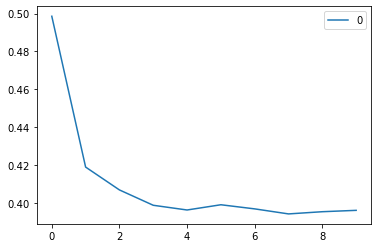

In [75]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
rmse_val = [] #to store rmse values for different k
for K in range(10):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

# 5. Support Vector Machine

In [76]:
#Library
from sklearn.svm import SVR
#Build Model
model = SVR(C= 1, gamma =0.5)
model.fit(x_train , y_train)

y_pred = model.predict(x_test)

accuracy=model.score(x_test, y_test)*100

print("\nAccuracy of Model is :",accuracy,'%')
print("\nPrediction is :",y_pred)


Accuracy of Model is : 83.17114627598437 %

Prediction is : [-4.66123275e-01  2.36045832e-01  1.55475348e+00 -1.22239657e-01
 -4.46567467e-01 -3.12325308e-01 -3.56358704e-01  1.42812257e-01
 -1.45488423e-01  1.77144687e-01  4.41538280e-01  1.43432029e+00
  1.31427248e+00 -5.41855033e-02  1.13280346e-01 -4.52543548e-01
  1.40831028e+00 -5.47741360e-01  5.04604023e-01  2.15932843e+00
 -5.84875120e-01  5.36957591e-02  1.84006887e+00  1.26880375e+00
 -3.59190584e-01 -8.57073161e-02  2.25123593e+00 -2.20671719e-01
 -3.42530926e-01  5.27843199e-01 -5.97264313e-01  1.90543083e+00
 -4.13747282e-01 -1.62635704e-01 -4.90914279e-01  6.10595897e-01
  4.24291070e-01  6.98774327e-01  4.23783303e-01 -2.48173188e-01
  9.94362937e-01  1.70674477e-01  3.49014285e-01 -9.48236168e-02
  4.34326978e-01 -1.50308845e-01  7.18866304e-01  1.19938437e+00
 -5.58232307e-01  1.38799578e-02  1.78568119e+00 -2.51221917e-01
  1.10030254e+00  7.60528156e-01 -2.93542946e-01 -1.59804062e-01
 -3.59796185e-01 -7.90865149e

# Grid Search CV for finding best Parameter

In [56]:
model = SVR()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15, 11, 0.1, 0.001] }]
gsv = GridSearchCV(model,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid=[{'C': [15, 11, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

gsv.best_params_ , gsv.best_score_ 


KeyboardInterrupt: 

In [115]:
#Build Model again with best Parameters
model = SVR(C= 15, gamma = 0.5,kernel='rbf')
model.fit(x_train , y_train)

y_pred = model.predict(x_test)

accuracy=model.score(x_test, y_test)*100

print("\nAccuracy of Model is :",accuracy,'%')
print("\nPrediction is :",y_pred)


Accuracy of Model is : 67.24420093781498 %

Prediction is : [ 8.12603127e-01  1.72564106e-01  8.43597050e-01  1.51302306e-01
  5.19178133e-02  3.77995143e-01  4.95153437e-01  4.74226727e-01
  1.79555037e-01  2.19553034e-01  2.94465537e-01  5.92972541e-01
  2.07301962e-01  5.00489588e-01  1.26867526e-01  1.96639273e-01
  3.58790651e-01  1.01532879e-01  2.97857207e-01  5.39024929e-01
  3.27721836e-01  4.49117773e-02  4.15939911e-01  1.84052947e-01
  1.13735399e+00  4.79987010e-01  6.79118713e-01  3.09629432e-01
  3.34931382e-01  1.66747726e-01  2.06231465e-01  6.47739431e-01
  4.43621965e-01  1.44847371e-01  5.28276012e-01  1.41449586e-01
  5.65792526e-01  3.34669953e-01  4.74891243e-01  3.45398125e-01
 -4.55412665e-02  8.04553027e-01  4.42875286e-02  2.97429243e-01
  2.87480786e-01  5.40303515e-02  9.87923124e-01  5.43541279e-01
  1.58672172e-01  2.37636885e-01  4.72274326e-01  2.63432735e-01
  4.13277055e-01  3.07955958e-01  6.86317065e-02  6.09500332e-01
  1.18351369e-01  5.85707942e

# 6. Random Forest

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
# create an object of the RandomForestRegressor
model_RFR = RandomForestRegressor(max_depth=10)

In [77]:
#Library
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 5, random_state = 0)
 
# fit the regressor with x and y data
regressor.fit(x_train , y_train)

#predicting on the test set and creating submission file

y_pred = regressor.predict(x_test)

accuracy = regressor.score(x_test, y_test)
print( 'Random Forest Accuracy: ', accuracy*100,'%')
print("Predicted value :",y_pred)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Random Forest Accuracy:  82.62001106572997 %
Predicted value : [-3.89225731e-01  2.94327665e-01  1.91398894e+00 -2.69032781e-01
 -2.52385479e-01 -4.54913559e-01 -4.32407310e-01 -7.07017359e-02
 -2.15513538e-01  8.59124679e-02  5.85585015e-01  1.69853174e+00
  1.66892715e+00 -7.49551072e-02  2.20555614e-01 -4.94630471e-01
  1.57008556e+00 -5.06348368e-01  2.66187810e-01  2.15485370e+00
 -4.99982395e-01  2.03936481e-01  1.94077673e+00  1.35291011e+00
 -1.83092145e-01  4.92658709e-02  2.15485370e+00 -1.45065315e-01
 -4.72377733e-01  7.92873490e-01 -5.14066406e-01  1.38727510e+00
 -2.10640470e-01  1.28108165e-01 -4.32407310e-01  5.22488645e-01
  8.56307876e-02  5.36572656e-01  3.23650576e-01 -3.24073096e-01
  1.24277314e+00 -1.21404176e-01  3.66184289e-02  2.67314531e-02
  2.20837294e-01 -2.55540298e-01  4.83898454e-01  1.18728214e+00
 -4.63363966e-01  1.84444210e-01  1.93655153e+00 -3.98408507e-01
  1.11936904e+00  6.90088377e-01 -3.74634696e-01  9.80247174e-03
 -4.28153938e-01  1.5627618

# 7. Navie Bayes

In [42]:
# Regression Libraries
from sklearn.linear_model import BayesianRidge
from sklearn import metrics
#Build Model
bayesianRidge = BayesianRidge()
bayesianRidge.fit(x_train,y_train)
y_pred = bayesianRidge.predict(x_test)
accuracy = bayesianRidge.score(x_test,y_test)

print( 'Random Forest Accuracy: ', accuracy*100,'%')
print("Predicted value :",y_pred)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

temp=pd.DataFrame(data=np.array([['GOLF_4_1_4__3TÜRER','test','kleinwagen','2001','manuell',75,'golf',150000,6,'benzin','volkswagen','nein',2016]]),columns=['name', 'abtest', 'vehicleType', 'yearOfRegistration', 'gearbox','powerPS', 'model', 'kilometer', 'monthOfRegistration', 'fuelType','brand', 'notRepairedDamage', 'dateCreated'])
for col in temp:
    if (temp.dtypes[col]==object):
        #Convert categorical col to Numeric
        temp[col]=temp[col].factorize(sort=True)[0]
#y_pred = regressor.predict(temp)
print("Predicted Price is :",bayesianRidge.predict(temp))

Random Forest Accuracy:  61.51560035239258 %
Predicted value : [0.34735874 0.45436595 0.39158915 ... 0.11970578 0.92343418 0.52762313]
Mean Absolute Error: 0.13338732009835746
Mean Squared Error: 0.03265055040931231
Root Mean Squared Error: 0.1806946330395906
Predicted Price is : [-0.2550511]
